# Setup 

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Big O notation

Big O notation establishes a worst-case run time. Take, for example, the case of a linear search, where we search an item on an array by checking every item one by one from left to right. The best-case scenario would be finding the item that we were looking for in the first attempt (this is, in the first position). The **worst** case would be finding it in the last position, after checking $n$ items ($n=$ number of items in the array).

We can express this by saying that a simple search takes $O(n)$ time to run. Another way of interpreting this is that the linear search will never be slower than $O(n)$ time. Big O notation lets you compare the number of operations, and tells you how fast an algorithm grows.

Here are some common big O run times:
* $O(\log n)$ $\rightarrow$ *Log time*, such as `binary search` (in this chapter)
* $O(n)$ $\rightarrow$ *Linear time*, such as in `simple search`
* $O(n \cdot \log n)$ $\rightarrow$ such as `quicksort` (in chapter 4)
* $O(n^{2})$ $\rightarrow$ such as `selection sort` (in chapter 2)
* $O(n!)$ $\rightarrow$ *Factorial time*, such as `traveling salesperson` (in this chapter)


Summary:
* Algorithm speed isn’t measured in seconds but in growth of the
number of operations.
* Instead of seconds, we talk about how quickly the run time of an
algorithm increases as the size of the input increases.
* Run time of algorithms is expressed in big O notation.
* $O(\log n)$ is faster than $O(n)$, and it gets a lot faster as the list of items
you’re searching grows.

# Linear search

In [2]:
def linear_search(arr, item):
    # set initial state
    index_guess = 0
    N_operations = 1

    # iterate through the items and check for our target
    for guess in arr:
        if guess == item:
            dict_results = {'guess' : guess,
                            'guess_index' : index_guess,
                            'N_operations' : N_operations}
            return dict_results
        else:
            index_guess += 1
            N_operations += 1
            
    # we did not find our target
    return None

In [3]:
arr = [0,1,3,5,7,9,12,15,64,100,101,105,107,109,201,401]

for item in [0,5,12,401]:
    dict_results = linear_search(arr, item)
    print(dict_results)

{'guess': 0, 'guess_index': 0, 'N_operations': 1}
{'guess': 5, 'guess_index': 3, 'N_operations': 4}
{'guess': 12, 'guess_index': 6, 'N_operations': 7}
{'guess': 401, 'guess_index': 15, 'N_operations': 16}


In [4]:
linear_search(arr, 69)

# Binary search

In [5]:
def binary_search(arr, item):
    # set initial state
    index_low = 0
    index_high = len(arr) - 1
    N_operations = 0

    # iterate through array-halving steps looking for our target
    while index_low <= index_high:
        index_guess = (index_low + index_high) // 2
        guess = arr[index_guess]
        N_operations += 1

        if guess == item:
             dict_results = {'guess' : guess,
                            'guess_index' : index_guess,
                            'N_operations' : N_operations}
             return dict_results
        elif guess > item:
            index_high = index_guess - 1
        else:
            index_low = index_guess + 1
            
    # we did not find our target
    return None

In [6]:
arr = [0,1,3,5,7,9,12,15,64,100,101,105,107,109,201,401]

for item in [0,5,12,401]:
    dict_results = binary_search(arr, item)
    print(dict_results)

{'guess': 0, 'guess_index': 0, 'N_operations': 4}
{'guess': 5, 'guess_index': 3, 'N_operations': 2}
{'guess': 12, 'guess_index': 6, 'N_operations': 4}
{'guess': 401, 'guess_index': 15, 'N_operations': 5}


In [7]:
binary_search(arr, 69)

# Linear vs Binary search

In [8]:
N = 5000000

arr = np.arange(N)

In [9]:
random = np.random.choice(arr, 1)

In [10]:
%%time

result = linear_search(arr, random)
print(result)

{'guess': 4347150, 'guess_index': 4347150, 'N_operations': 4347151}
CPU times: user 3.38 s, sys: 0 ns, total: 3.38 s
Wall time: 3.38 s


In [11]:
%%time

result = binary_search(arr, random)
print(result)

{'guess': 4347150, 'guess_index': 4347150, 'N_operations': 22}
CPU times: user 164 μs, sys: 0 ns, total: 164 μs
Wall time: 160 μs


# Visual representation of computational cost

In [12]:
list_O_functions = [
    (lambda x: np.log(x), 'O(log n)'),
    (lambda x: x, 'O(n)'),
    (lambda x: x * np.log(x), 'O(n log n)'),
    (lambda x: x**2, 'O($n^2$)'),
]

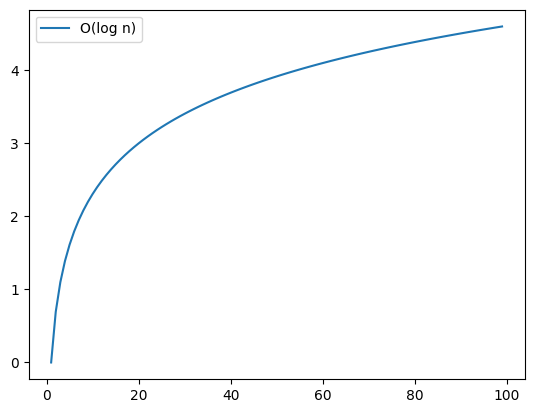

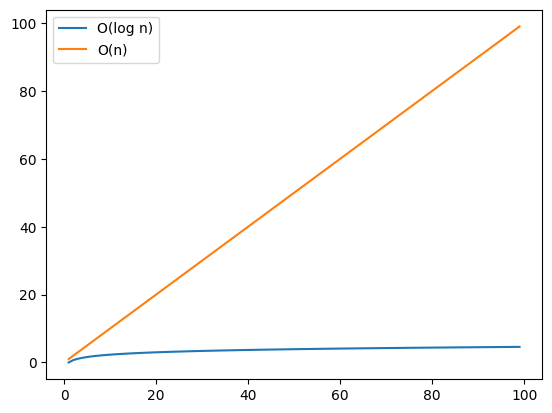

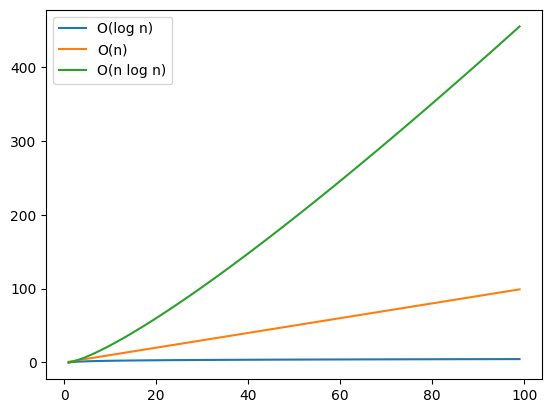

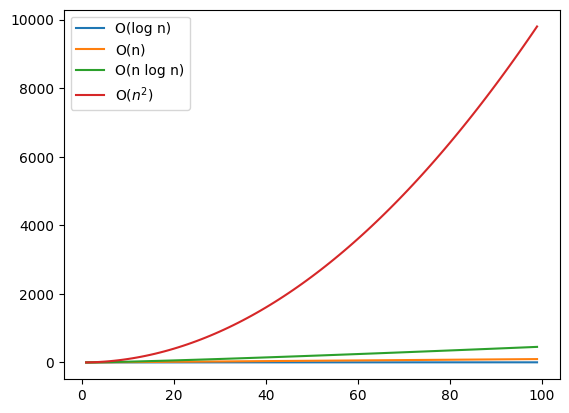

In [13]:
X = np.arange(1,100)
for i in range(1, len(list_O_functions)+1):
    for func, str_label in list_O_functions[:i]:
        plt.plot(X, func(X), label=str_label)
    plt.legend()
    plt.show()

# Traveling salesperson

A salesperson wants to go through five cities while traveling the minimum distance. One way to do this is by checking every possible order in which they could travel to the cities, add up the total distance for every permutation, and pick the path with the lowest total distance. There is a slight issue though: this algorithm runs in $O(n!)$ time, or *factorial time*. For five cities, it would take 5! or 120 operations. For six, 720. And for seven, 5040.

There is no fast known algorithm to solve this problem, but we can come up with an approximate solution (check chapter 10).

# Exercises

**1.1** Suppose you have a sorted list of 128 names, and you're searching through it using binary search. What's the maximum number of steps it would take?

**Answer**: Nmax_steps = $\log_2{128} = 7$

**1.2** Suppose you double the size of the list. What's the maximum number of steps now?

**Answer**: One additional step, Nmax_steps = $\log_2{128*2} = 7 + 1 = 8$




__Give the run time for each of these scenarios in terms of big O__

**1.3** You have a name, and you want to find the person's phone number in the phone book.

**Answer**: If we use binary search and the phonebook is sorted, $O(\log n)$


**1.4** You have a phone number, and you want to find the person's name in the phone book. (*Hint: You'll have to search through the whole book!)*

**Answer**: Since we cannot use binary search (the phonebook is not sorted by phone number), $O(n)$

**1.5** You want to read the numbers of every person in the phone book.

**Answer**: $O(n)$

**1.6** You want to read the numbers of just the As. (This is a tricky one! It involves concepts that are covered more in chapter 4. Read the answer -- you may be surprised!)

**Answer**: Wild guess, but it seems that the *worst* case running time would be if all the people in the phone book have As, thus being $O(n)$.

Checking the solutions, this is correct! Apparently, a reasonable (but wrong) assumption could have been 1/26 O(n). In this case, my reasoning about the *worst* case (all the telephone numbers being for people with As) guided me to the correct answer.

The *relevant* take-home message is that numbers that are added, substracted, multiplied, or divided can be ignored.